# E-Signature

In [1]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
plt.rcParams['figure.figsize'] = (6.0, 6.0)
plt.rcParams['image.cmap'] = 'gray'

## Read and Display the Original Handwritten Signature

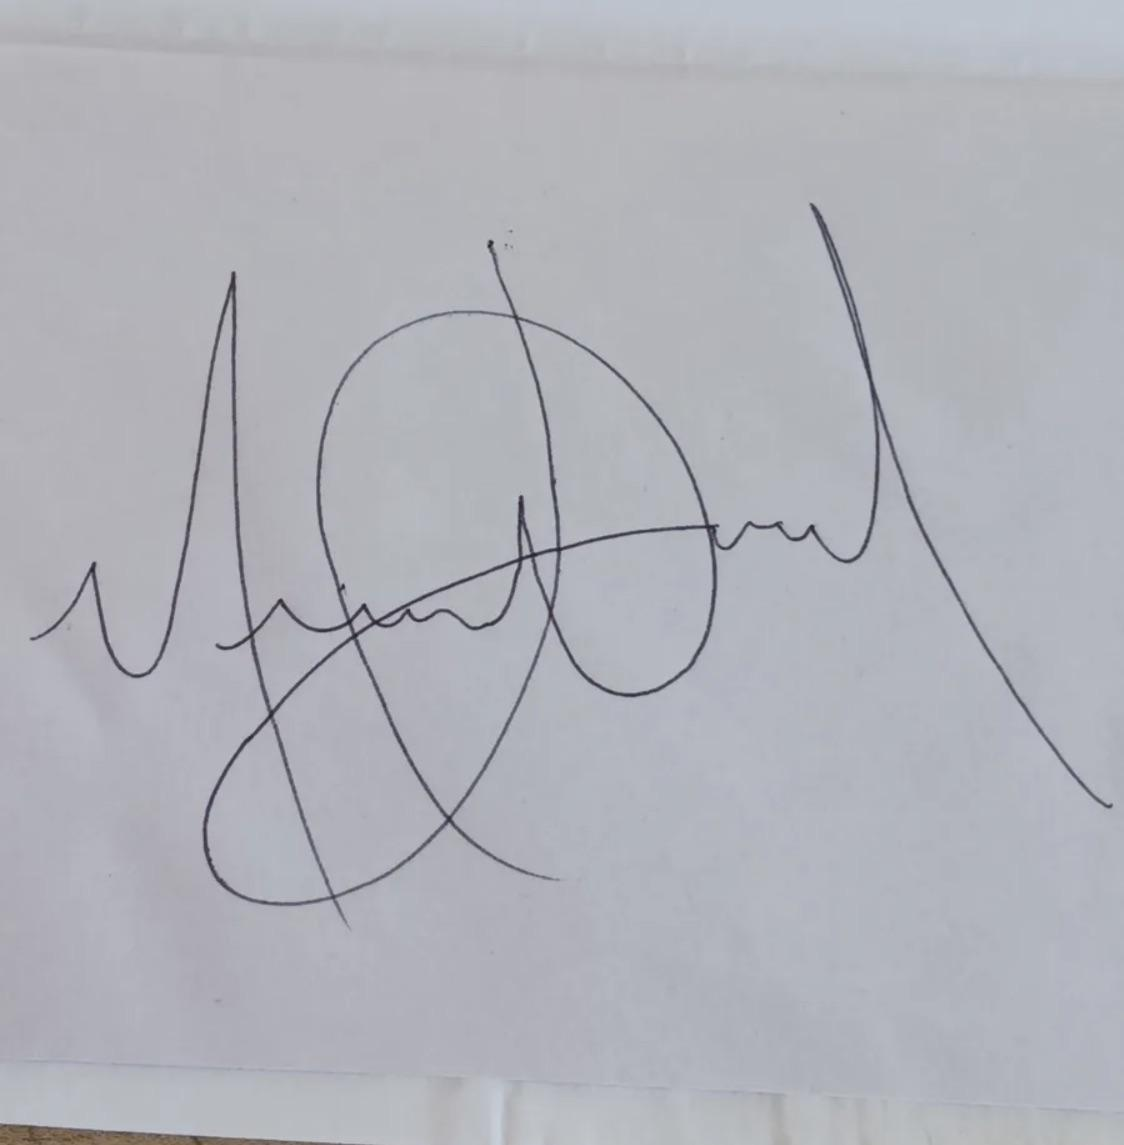

In [3]:
sig_org = cv2.imread('mj_autograph.jpg', cv2.IMREAD_COLOR)

Image('mj_autograph.jpg', width=400)

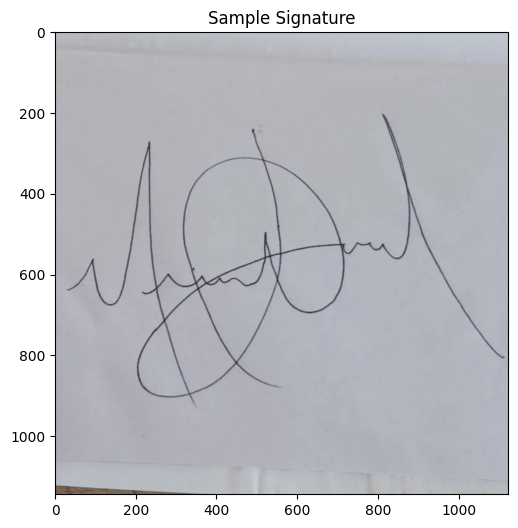

In [4]:
plt.imshow(sig_org[:, :, ::-1])
plt.title('Sample Signature');

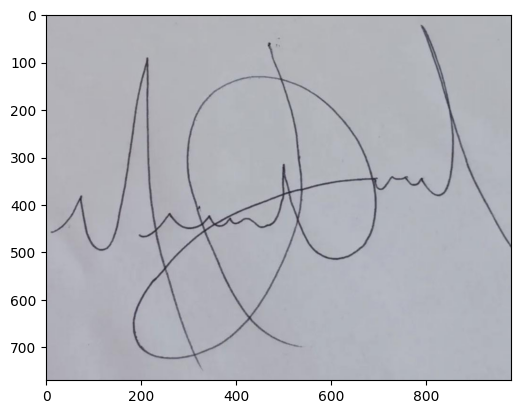

In [6]:
sig = sig_org[180:950, 20:1000, :]
plt.imshow(sig[:, :, ::-1]);

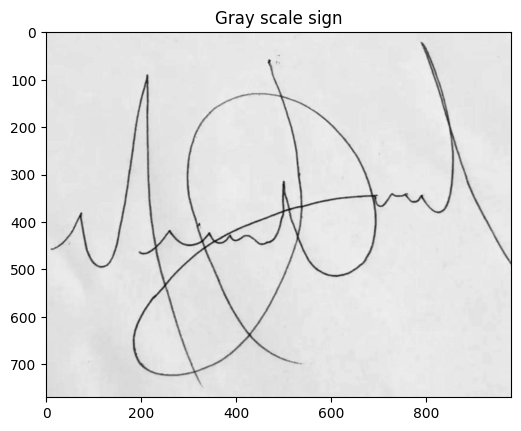

In [7]:
sig_gray = cv2.cvtColor(sig, cv2.COLOR_BGR2GRAY)
plt.imshow(sig_gray)
plt.title('Gray scale sign');

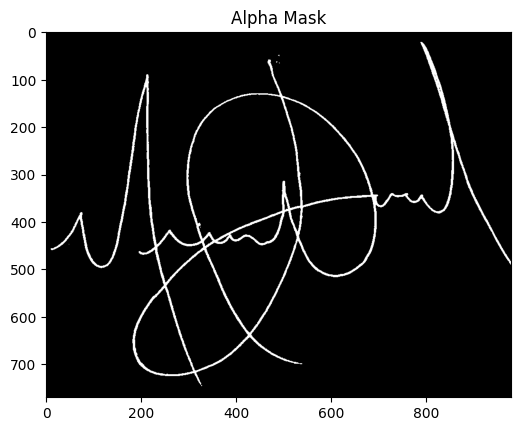

In [8]:
ret, alpha_mask = cv2.threshold(sig_gray, 150, 255, cv2.THRESH_BINARY_INV)
cv2.imwrite('alpha_mask.jpg', alpha_mask)
plt.imshow(alpha_mask)
plt.title('Alpha Mask');

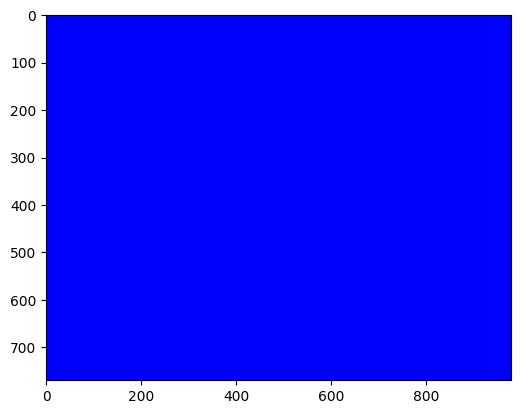

In [9]:
blue_mask = sig.copy()
blue_mask[:, :] = (255, 0, 0)
plt.imshow(blue_mask[:, :, ::-1]);

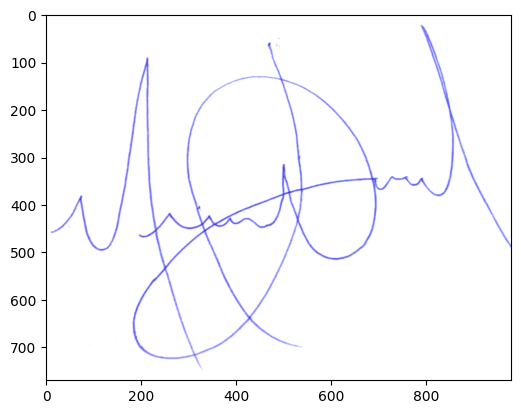

In [18]:
sig_color = cv2.addWeighted(sig, 1.5, blue_mask, 0.5, 0)
plt.imshow(sig_color[:, :, ::-1]);

In [19]:
b, g, r = cv2.split(sig_color)
print(b.shape)
print(g.shape)
print(r.shape)

(770, 980)
(770, 980)
(770, 980)


## Add the Alpha mask as a 4th channel and merge the channels

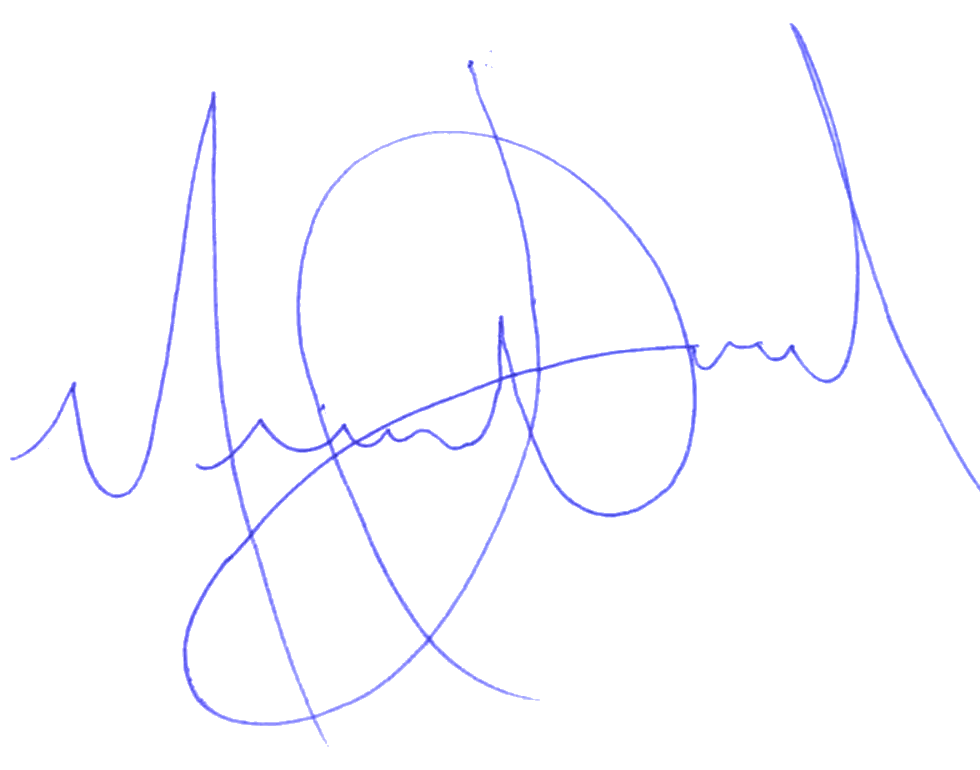

In [21]:
new = [b, g, r, alpha_mask]

png = cv2.merge(new, 4)

cv2.imwrite('extracted_sig.png', png)

Image('extracted_sig.png', width='400')